In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train_df.shape

(31647, 18)

In [5]:
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# univariate analysis of the target variable subscribed


In [7]:
train_df["subscribed"]

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

In [8]:
train_df["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train_df["subscribed"].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

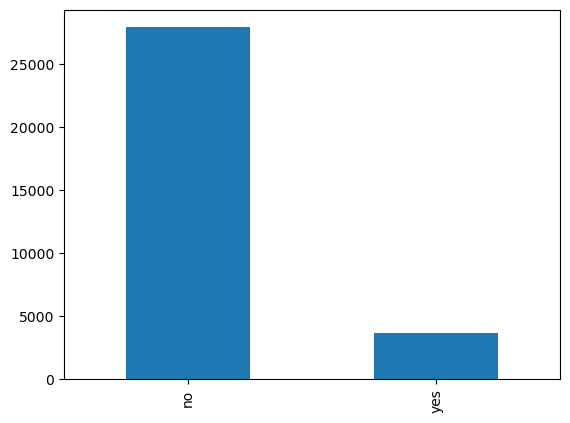

In [10]:
train_df["subscribed"].value_counts().plot.bar()

C:\Users\Chirag\AppData\Local\Temp\ipykernel_24884\495888859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["age"])


<Axes: xlabel='age', ylabel='Density'>

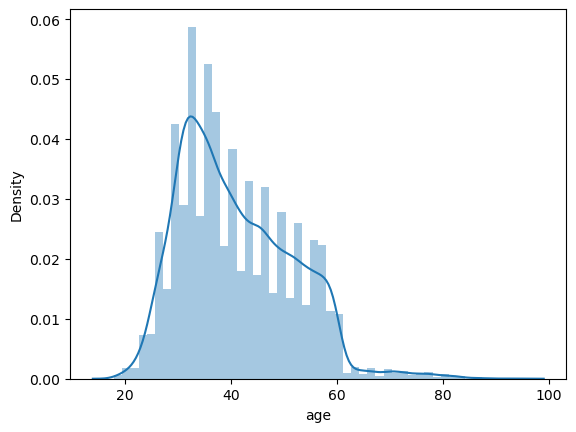

In [11]:
sns.distplot(train_df["age"])

<Axes: >

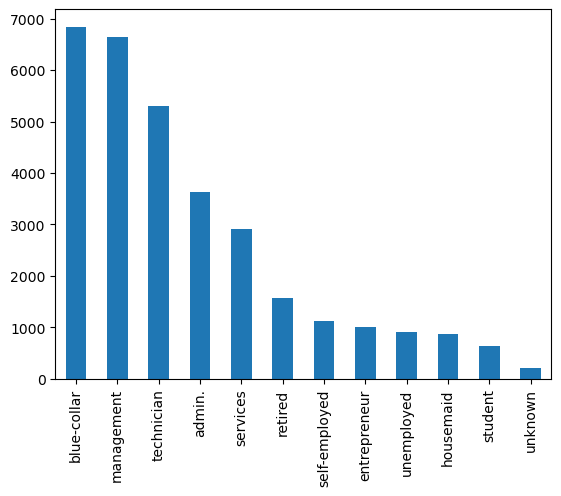

In [12]:
train_df["job"].value_counts().plot.bar()

<Axes: >

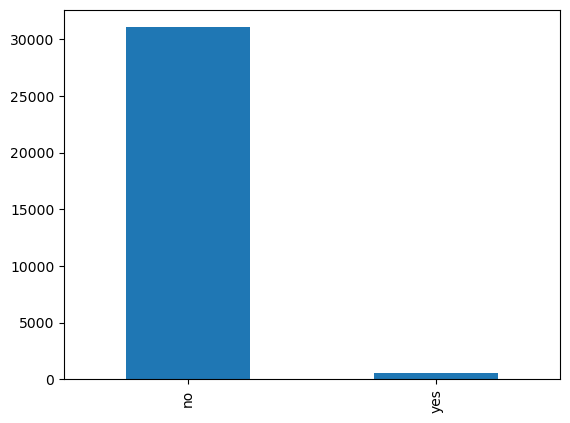

In [13]:
train_df["default"].value_counts().plot.bar()

# Bivariate analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'percentage')

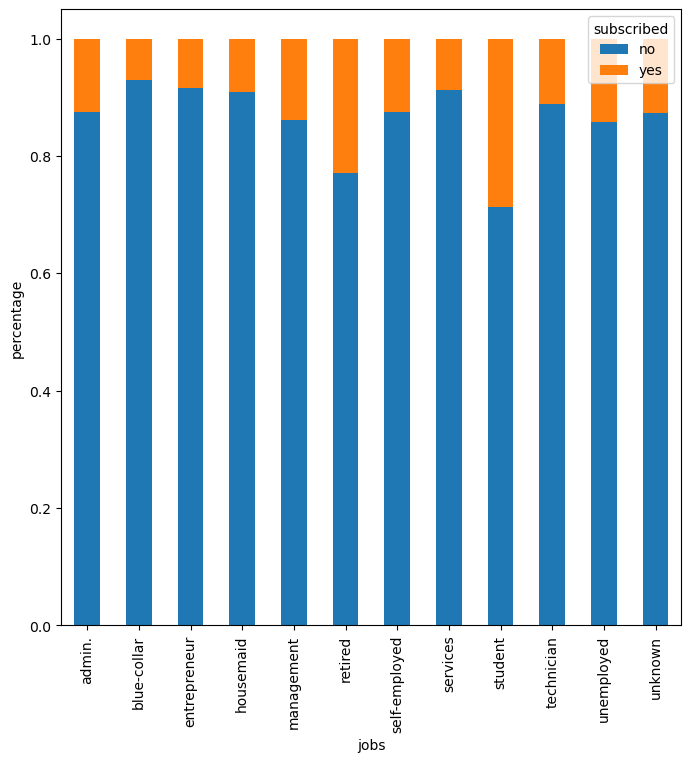

In [14]:
print(pd.crosstab(train_df["job"],train_df["subscribed"]))

job = pd.crosstab(train_df["job"], train_df["subscribed"])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel("jobs")
plt.ylabel("percentage")

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'percentage')

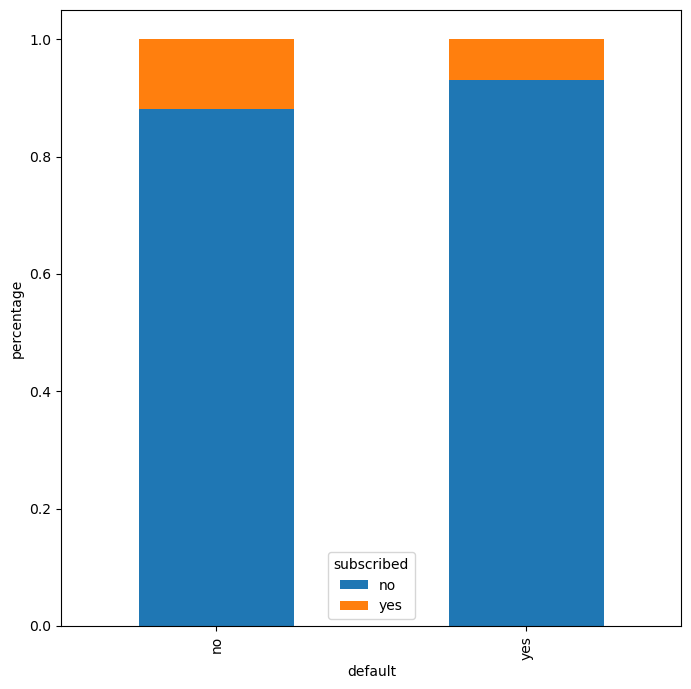

In [15]:
print(pd.crosstab(train_df["default"],train_df["subscribed"]))

default = pd.crosstab(train_df["default"], train_df["subscribed"])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel("default")
plt.ylabel("percentage")

# correlation analysis

In [16]:
train_df["subscribed"].replace("no",0,inplace = True)
train_df["subscribed"].replace("yes",1,inplace = True)


C:\Users\Chirag\AppData\Local\Temp\ipykernel_24884\2671986865.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


<Axes: >

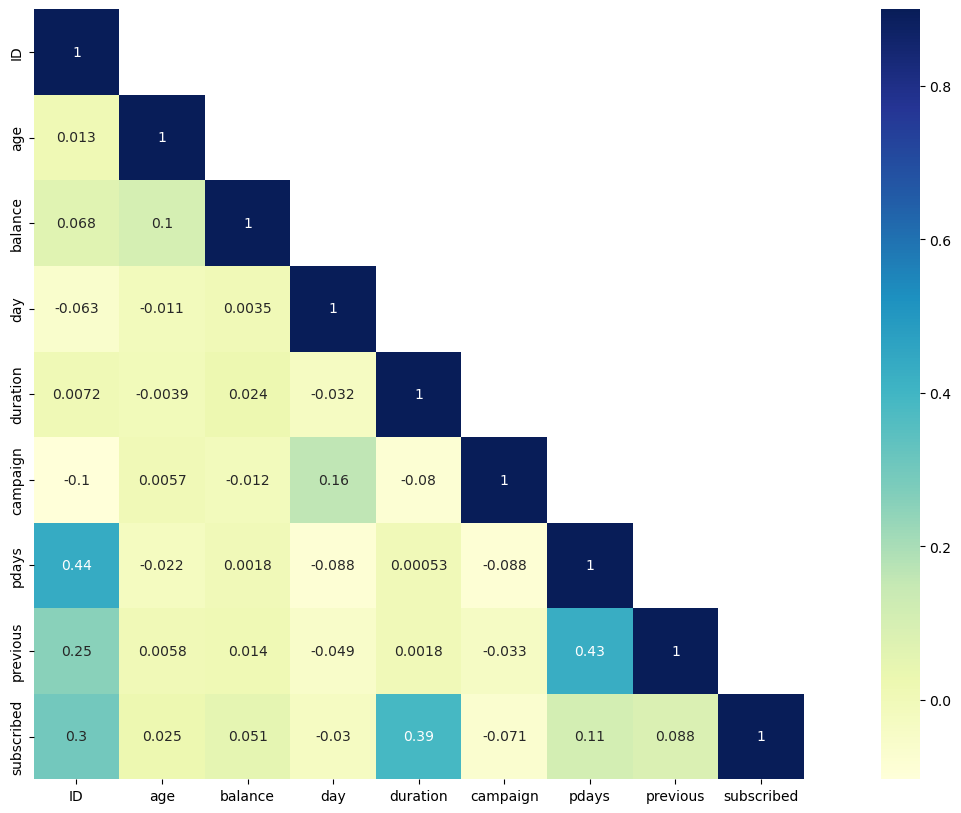

In [17]:
corr = train_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# model building

In [18]:
target = train_df["subscribed"]
train_df = train_df.drop("subscribed",1)

C:\Users\Chirag\AppData\Local\Temp\ipykernel_24884\3404178428.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df = train_df.drop("subscribed",1)


In [19]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [20]:
train_df = pd.get_dummies(train_df)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_val,y_train,y_val = train_test_split(train_df,target,test_size=0.2,random_state=12)

# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lreg = LogisticRegression()

In [26]:
lreg.fit(X_train,y_train)

C:\Users\Chirag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
prediction = lreg.predict(X_val)

In [28]:
print(prediction)

[0 0 0 ... 0 0 0]


In [29]:
arr = np.array(prediction)

In [30]:
print(arr)

[0 0 0 ... 0 0 0]


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_val,prediction)

0.889257503949447

# decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier 

In [36]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [37]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [38]:
prediction = clf.predict(X_val)

In [39]:
accuracy_score(y_val,prediction)

0.9042654028436019

In [40]:
test_df = pd.get_dummies(test_df) 

In [41]:
test_prediction = clf.predict(test_df)

In [42]:
submission = pd.DataFrame()

In [43]:
submission["ID"] = test_df["ID"]

In [44]:
submission["submission"] = test_prediction

In [45]:
submission["submission"].replace(0,"no",inplace=True)
submission["submission"].replace(1,"yes",inplace=True)

In [47]:
submission.to_csv("test_pred.csv",header =True,index=False)